# Task 1: Generate your own data and run a simple logistic regression
As indicated in the [read me](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/README.md), our first task is to generate some synthetic data and to estimate a logistic regression model from that data. To that end, you will need a couple of standard libraries, which we can import using the *import* statement, as shown below. Note that this code should work without further adjustments, not matter whether you use Colab or have setup a Jupyter notebook server on your machine. In general, however, you would need to install a library before you can import and use it in the way shown below. 


# New Section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression

mpl.style.use('default')


## Generating Data

For this exercise we will generate our own (synthetic) data, to better understand what we are doing and what the logistic regression in particular does. For example, we will consider data in two dimensions. This is useful because we can easily plot the data.

To create synthetic data, you will use routines to generate random numbers. To ensure that you get the same result when you run your code multiple times, you should first fix the seed of the random number generator. We have already created a *code* cell below, which you can now edit to fix the seed.

(Hint: if you have paid attention to the [read me](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/README.md), this task should be familiar.) 

In [2]:
# set random seed, such that every run yields the same sequence of random numbers
np.random.seed(1234)

We want to generate a data set for binary classification. This means that each of the data points that we will create belongs to one out of two classes.

A surprisingly large number of real-life (business) problems can be framed as a two-class classification problem, as we will discuss intensively in the course. 

To facilitate plotting the data, we will focus on a two-dimensional setting. Each of our data points is characterized by two attributes or, if you prefer, (independent) variables. Assume you want to predict whehter a machine is going to break in the next week. Break or do not break are the two possible states (i.e., classes). The attributes could then be the temperature of the machine and the time it is running.

In this task, we assum that the data of each class comes from a multivariate normal distribution. Utilize the different functions within *numpy.random* to generate normally distributed data. Note that you need two normals with different parameters; one set of parameters for class 1 and another set of parameters for class 2. You can play with the parameters to create data in which the seperation of the two classes using a classification model is easier or harder. 

Create a reasonable number of observations, e.g., around 1000 - 5000. Recall that you need to store three values for each data point, one for the class label (class 1 or class 2) and one value for each of the two attributes. Examine ways to store the data in a matrix-like array. 

In [3]:
# Write code to generate your data with two normally distributed attributes and a binary class label.


# var_1 = np.random.multivariate_normal(mean=[0,0], cov=[[1, .75],[.75, 1]], size=1000)
# var_2 = np.random.multivariate_normal(mean=[0,0], cov=[[1, .75],[.75, 1]], size=1000)

class1_x = np.random.normal(loc=1, scale=1, size=1000)
class1_y = np.random.normal(loc=1, scale=1, size=1000)

class2_x = np.random.normal(loc=4, scale=1, size=1000)
class2_y = np.random.normal(loc=4, scale=1, size=1000)

lab1 = np.repeat(0, 1000)
lab2 = np.repeat(1, 1000)

class1 = np.vstack((class1_x, class1_y)).T
class2 = np.vstack((class2_x, class2_y)).T

data = np.vstack((class1,class2))
labels = np.concatenate((lab1,lab2))

Once you have created your data, create a scatter plot using the function *scatter*, which the library matplotlib provides. Here you can find an [example how your result shoud look like](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/prodoc_ml_miniassign_1_demo_plot1.png). In the example, we have denoted our two variables as $x_1$ and $x_2$ and used the binary class label to color the data points. 

Do not forget to alter the parameters of your two normal distributions and examine how changing the parameters make the two classes easier or harder to distinguish.
  

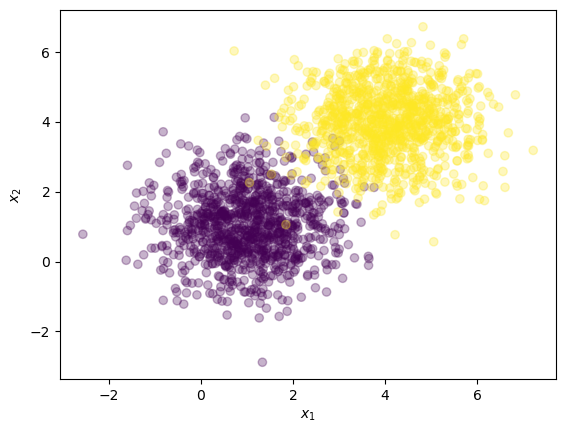

In [4]:
# Write code to create the scatter plot
plt.scatter(data[:,0], data[:,1], c=labels, alpha=.3);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

Next up, we would like to solve our toy classification problem using logistic regression. By 'solve' we mean that the logistic model should be able to distinguish data points of the two classes based on their attribute values. More formally, given a data point $ \boldsymbol x \in \mathbb{R}^2 $ with values $x_1$ and $x_2$, our logistic model should provide an estimate of the probability $p \left ( y| \boldsymbol x \right )$, with $ y \in \left \{ 0,1 \right \} $ denoting the binary class label. To achieve this, the logistic model will maximize the likelihood of the data. In case this does not sound familiar, note that we will brielfy revisit logistic regression in the course. Still, it would be a good idea to read the [wikipedia page on logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) or one of the many tutorials on the topic (e.g., [here](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)) to refresh your stats skills.  

With regard to Python, both statsmodels and scikit learn are good python packages to use for logistic regression. Start with using scikit learn. Make sure to set the penalty to 'none' such that no regularization is applied.

In [5]:
# Insert code to estimate a logistic regression model using scikit learn
model = LogisticRegression(penalty='none', fit_intercept=True)
model.fit(data, labels)

LogisticRegression(penalty='none')

Having estimated the logit model, we want to evaluate our results. To that end, we first inspect the estimated model, i.e. the intercept term and the coefficients. You should be familiar with this step from your experiences with [linear regression](https://en.wikipedia.org/wiki/Linear_regression).

In [6]:
# Print intercept and coefficients of the estimated logit model
print('Intercept:')
print(model.intercept_)

print('Coefficients:')
print(model.coef_)

Intercept:
[-14.55691562]
Coefficients:
[[2.97604589 2.75860779]]


Speaking about linear regression, wasn't there are nice way to summarize the estimated model, depicting coefficient values, test statistics, p-values and the like? Should'nt logistic regression gives a similarly neat output? Yes, it should and it actually can, provided we use the statsmodels package instead of scikitlearn. In brief, scikit-learn is the 'goto-library' for machine learning in Python. We will use it a lot in the course. However, let's also play with statsmodels. 

Repeat the above task and estimate a logit model but this time using statsmodels.  Also produce a compelling summary table of your model including p-values and fitting statistics. Use a different variable name for the resulting model, for instance 'stat_model_logit', than you used above.

In [7]:
 # Code to run logistic regression and output resulting model using statsmodel library
import statsmodels.api as sm
stat_model_logit=sm.Logit(labels,data)
result=stat_model_logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.558582
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.194      
Dependent Variable: y                AIC:              2238.3282  
Date:               2021-12-15 09:35 BIC:              2249.5300  
No. Observations:   2000             Log-Likelihood:   -1117.2    
Df Model:           1                LL-Null:          -1386.3    
Df Residuals:       1998             LLR p-value:      4.5067e-119
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
----------------------------------------------------------------------
       Coef.      Std.Err.       z        P>|z|      [0.025     0.975]
----------------------------------------------------------------------
x1     0.2373       0.0385     6.1583     0.0000     0.1618     0.3128
x2     0.1607       0.0384     4.1795

Furthermore, we want to look at the classification accuracy of the model, that is the number of cases it classifies correctly. For simplicity, we will calculate classification accuracy **in-sample**.  This means that we use the same data set, which we used to before to estimate the model, to compute its accurcy. Note that this is typically a bad idea. We will discuss why in the course, but maybe you already have an answer? 

Calculating classification accuracy, i.e. the fraction of correctly classified cases, requires setting a probability treshold might. Let's consider a value of .5 for now. 

If the accuracy is wildly off, either you deliberately generated data that was hard to separate into classes or you did something wrong. Go back to data generation, alter the parameters of the normal distributions, and examine how accuracy varies with parameter adjustments. 

In [8]:
# Calculate the classification accuracy of the logit model in-sample using a classification cut-off of 0.5
# Using inbuild scikit-learn functionality, you can achive this with one line of code
print('Accuracy:')
model.score(data, labels)

Accuracy:


0.9835

To get a better intuition for how the logistic regression works, we want to plot the decision boundary of the regression model given our datapoints. There are multiple options to do this, the simplest being drawing a line given the parameters of the model. Also adding our data, as we did before, this will produce a very nice graph of our classification problem and the classify we developed. Here is once again an [example](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/prodoc_ml_miniassign_1_demo_plot2.png). Your plot should look similar.

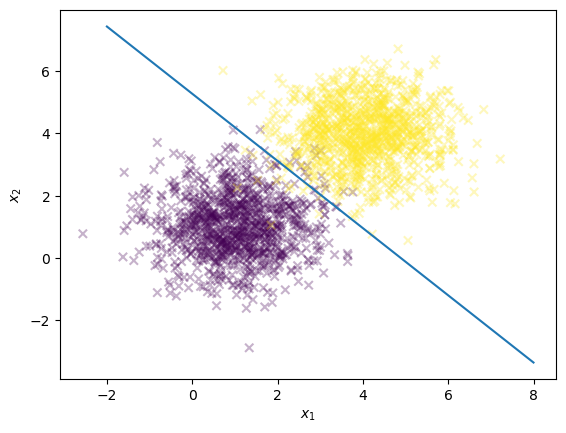

In [9]:
# Write code to create a two-dimensional plot of the data and how the logistic regression seperates the two classes
w = model.coef_[0]
xx = np.linspace(-2,8)

a = -w[0] / w[1]
b = -model.intercept_[0] / w[1]

yy = a * xx + b

fig = plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels, alpha=.3, marker='x')
plt.plot(xx,yy);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

Alternatively we can create a better visualization where we evaluate the probability estimates of our model for every point in a mesh grid. Given that the logistic regression actually outputs probability estimates for every data point to be in a certain class, this might give a more accurate intuition on the inner workings of the logistic model. Once more, your task is to re-create [this visualization](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/prodoc_ml_miniassign_1_demo_plot3.png). 

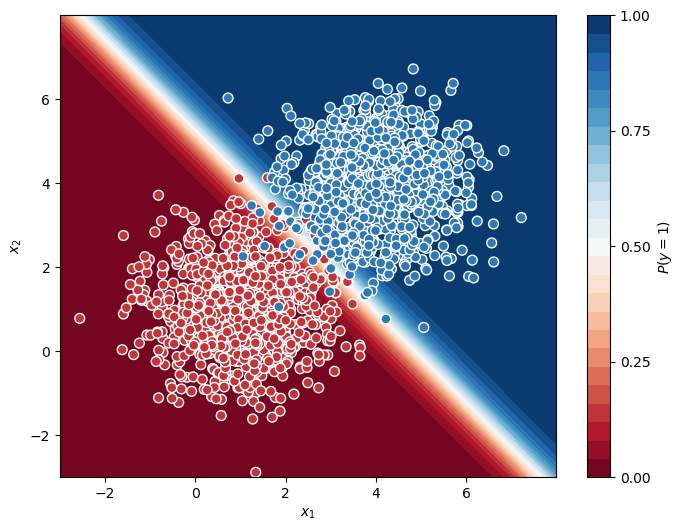

In [10]:
# Write code to create a similar plot like about but also showing the probability output of the logistic model 
xx, yy = np.mgrid[-3:8:.01, -3:8:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(data[:,0], data[:,1], c=labels, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");


That was it, well done! You have completed the first task of the mini-assignment. Feel free to play around with other distributions and their parameters to generate different data. For example, you could change the data generation in such a way a linear classifier like logistic regression is no longer able to seperate the classes with high accuracy. Or else, adjust the data generation in such a way that one of the attributes is irrelevant for classification. How would that change the pictures and the logit model?

# Conclusion
We can think of the rows of a table as individual data points in a multi-dimensional space, which is defined by the attributes we have at our disposal. In supervised machine learning, we always have one special attribute, often called the target variable. We have chosen the target variable to be a binary indicator in this example. It could also be a real number. Either way, supervised machine learning is about means of estimating a function that mimics the relationship between the target variable and the attributes. This is excatly what we have done above using logistic regression. In the course, we will learn about several other, more advanced techniques to estimate the function. However, the underlying principles remain unchanged. Make sure that you fully understand the above graph depicting the data, model, and probability estimates coming from the model. It is a great resource to grasp supervised machine learning.

Now, take a little breath and move on to the second task, where we will work with real data.